
<p><b>Group :</b> AAI Group 3</p>
<p><b>Date :</b> 11 October 2024</p>
<p><b>Dataset :</b> Heart Disease</p>
<p><b>Contributors :</b>John Kalaiselvan, Prasanna G., Sai Ramanan M K</p>


<center><p><u>Attributes of Dataset</u></p></center>
<li><b>age:</b> Age of the patient (in years) - Continuous Variable</li>
<li><b>sex:</b> Sex of the patient (1 = male, 0 = female) - Discrete Variable</li>
<li><b>cp:</b> Chest pain type (1-4) - Discrete Variable</li>
<li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital) - Continuous Variable</li>
<li><b>chol:</b> Serum cholesterol in mg/dl - Continuous Variable</li>
<li><b>fbs:</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) - Discrete Variable</li>
<li><b>restecg:</b> Resting electrocardiographic results (0-2) - Discrete Variable</li>
<li><b>thalach:</b> Maximum heart rate achieved - Continuous Variable</li>
<li><b>exang:</b> Exercise-induced angina (1 = yes; 0 = no) - Discrete Variable</li>
<li><b>oldpeak:</b> ST depression induced by exercise relative to rest - Continuous Variable</li>

In [134]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sn 
from scipy.stats import chi2_contingency, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [135]:
#Read the dataset

df = pd.read_csv("./heart-disease.csv")
print(f"The attributes in Heart Disease Dataset : \n{df.columns.to_list()}\n")
print(df.shape)
df.head()

The attributes in Heart Disease Dataset : 
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
# Descriptive Analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


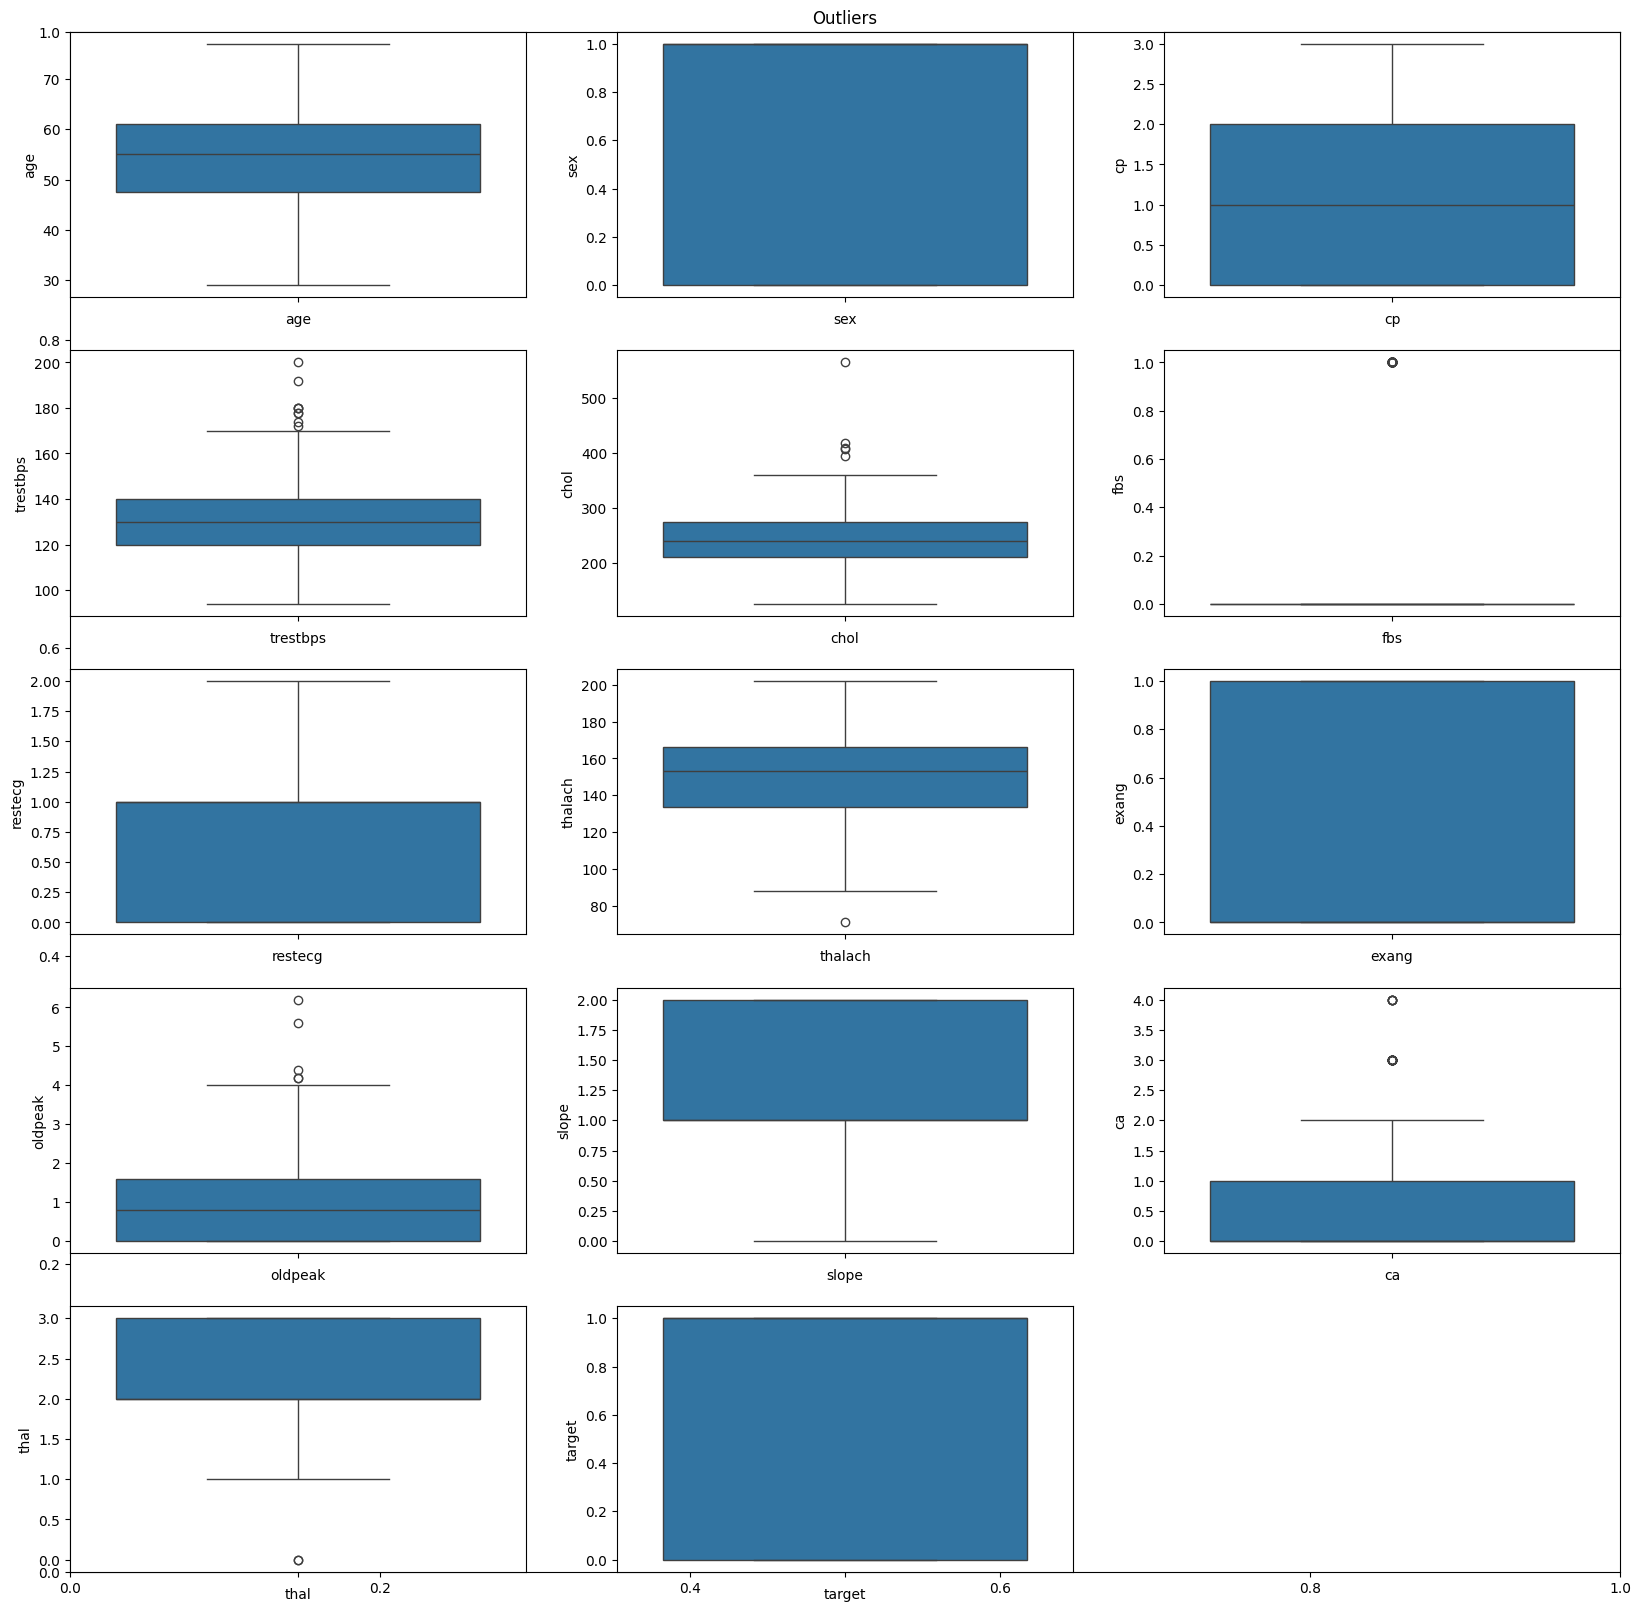

In [137]:
# Box Plot to find Outliers
fig = plt.figure(figsize=(20,20))
plt.title("Outliers")
gs = gridspec.GridSpec(5,3)
count = 0
for i in df.columns:
    if(i!="Target"):
        a = fig.add_subplot(gs[count])
        a.set_xlabel(i)
        sns.boxplot(df[i],ax=a)
        count+=1

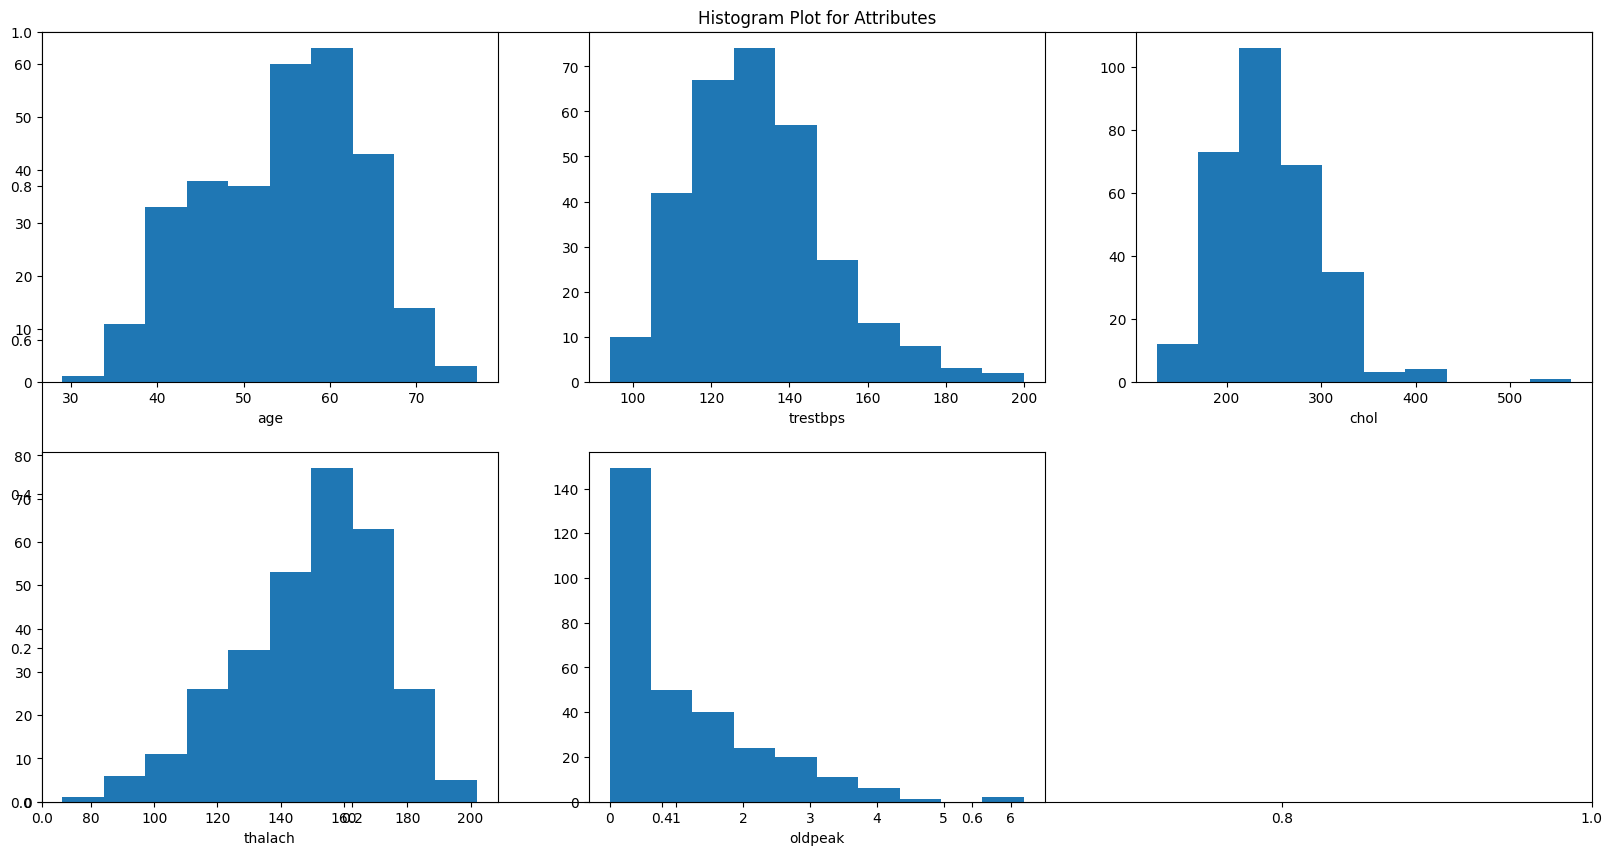

In [138]:
# Distribution of Individual Attributes
continuousAttributes = ["age", "trestbps", "chol" ,"thalach", "oldpeak"]
fig = plt.figure(figsize=(20,10))
plt.title("Histogram Plot for Attributes")
gs = gridspec.GridSpec(2,3)
count = 0
for i in continuousAttributes:
    a = fig.add_subplot(gs[count])
    a.set_xlabel(i)
    df[i].hist(ax=a, grid=False)
    count+=1
#Q-Q plot


<Axes: title={'center': 'Heatmap of Heart Disease Dataset'}>

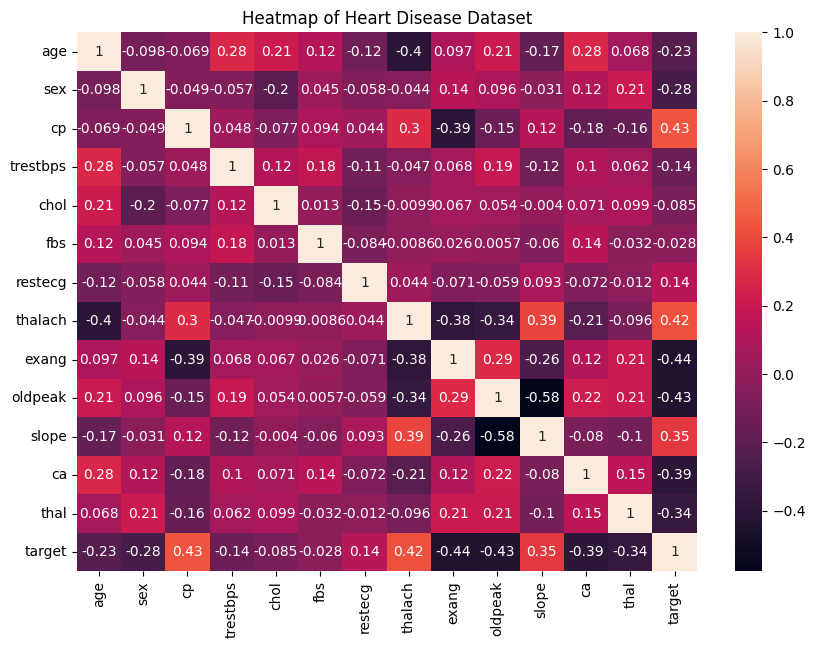

In [139]:
# Inferential Analysis - Correlation
plt.figure(figsize=(10, 7)) 
plt.title('Heatmap of Heart Disease Dataset')
sn.heatmap(data=df.corr(), annot=True)

# Statistical Significance
# typesofVariables = {"Continuous" :  ["age", "trestbps", "chol" ,"thalach", "oldpeak"],
#                     "Discrete" : ["sex", "cp", "fbs", "restecg", "exang"]}

# print("-----------Correlation Between Discrete Attributes using Chi2 test-----------")
# arrCorr = []
# header = ["Correlation Between", "Chi2 Statistic", "P value", "Degree of freedom"]
# for i in range(len(typesofVariables["Discrete"])):
#     for j in range(i+1, len(typesofVariables["Discrete"])):
#         o = typesofVariables["Continuous"][i]
#         s = typesofVariables["Continuous"][j]
#         contingency_table = pd.crosstab(df[o], df[s])
#         chi2, p, dof, expected = chi2_contingency(contingency_table)
#         arrCorr.append([f"{o} v {s}", chi2, p, dof])
        
# print(tabulate(arrCorr,header, tablefmt="pretty"))

# print("-----------Correlation Between Continuous Attributes using Chi2 test-----------")
# arrCorr = []
# header = ["Correlation Between", "Pearson Statistic", "P value"]
# for i in range(len(typesofVariables["Continuous"])):
#     for j in range(i+1, len(typesofVariables["Continuous"])):
#         o = typesofVariables["Continuous"][i]
#         s = typesofVariables["Continuous"][j]
#         pearson, p = pearsonr(df[o], df[s])
#         arrCorr.append([f"{o} v {s}", pearson, p])
        
# print(tabulate(arrCorr,header, tablefmt="pretty"))

In [140]:
# Validate 4 Assumptions

In [141]:
# Regression Types - (Multi-Linear, Exponential Regression)
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


<h4>GLM Regression</h4>

In [142]:
X_train = sm.add_constant(X_train)
model_glm = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                            GLM   Df Residuals:                      198
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.283
Date:                Wed, 16 Oct 2024   Deviance:                       136.57
Time:                        23:42:49   Pearson chi2:                     197.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5204
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2052      3.246      0.679      0.497      -4.157       8.568
age            0.0046      0.028      0.165      0.869      -0.051       0.060
sex           -1.5204      0.581     -2.616      0.009      -2.660      -0.381
cp             0.8874      0.236      3.757      0.000       0.424       1.350
trestbps      -0.0097      0.013     -0.757      0.449      -0.035       0.015
chol          -0.0028      0.004     -0.663      0.507      -0.011       0.006
fbs            0.6745      0.758      0.889      0.374      -0.812       2.161
restecg        0.8256      0.446      1.851      0.064      -0.048       1.700
thalach        0.0170      0.013      1.283      0.199      -0.009       0.043
exang         -1.3440      0.520     -2.584      0.010      -2.363      -0.324
oldpeak       -0.4927      0.284     -1.735      0.083      -1.049       0.064
slope          1.0399      0.432      2.409      0.016       0.194       1.886
ca            -1.2059      0.285     -4.227      0.000      -1.765      -0.647
thal          -1.3399      0.382     -3.509      0.000      -2.088      -0.591
==============================================================================
"""

In [143]:
X_test = sm.add_constant(X_test)
pred_glm = model_glm.predict(X_test)
predResult = []
for val in pred_glm:
    if(val>0.5):
        predResult.append(1)
    else:
        predResult.append(0)
predResult = pd.Series(predResult)

accuracy = accuracy_score(y_test, predResult)
precision = precision_score(y_test, predResult)
recall = recall_score(y_test, predResult)
f1 = f1_score(y_test, predResult)
conf_matrix = confusion_matrix(y_test, predResult)
# Model Performance Metrics
print(f"Accuracy(%): {round(accuracy*100,2)}%")
print(f"Precision: {round(precision*100,2)}%")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy(%): 80.22%
Precision: 82.0%
Recall: 0.82
F1-Score: 0.82
Confusion Matrix:
[[32  9]
 [ 9 41]]


In [144]:
#Removing outliers in ca, thal column
df = df[df["ca"]<=2.5]
df = df[df["thal"]>0.5]
# df = df[df["trestbps"]<170]
# 
print(df.shape)
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)
model_glm = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
model_glm.summary()

(276, 14)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  193
Model:                            GLM   Df Residuals:                      179
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61.419
Date:                Wed, 16 Oct 2024   Deviance:                       122.84
Time:                        23:42:49   Pearson chi2:                     246.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5219
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0863      3.562      0.305      0.760      -5.895       8.068
age            0.0331      0.033      1.015      0.310      -0.031       0.097
sex           -2.0071      0.636     -3.157      0.002      -3.253      -0.761
cp             0.9430      0.261      3.615      0.000       0.432       1.454
trestbps      -0.0209      0.013     -1.605      0.109      -0.046       0.005
chol          -0.0042      0.005     -0.904      0.366      -0.013       0.005
fbs            0.0881      0.702      0.125      0.900      -1.288       1.464
restecg        0.9283      0.476      1.949      0.051      -0.005       1.862
thalach        0.0284      0.015      1.934      0.053      -0.000       0.057
exang         -0.9127      0.545     -1.673      0.094      -1.982       0.156
oldpeak       -0.4100      0.301     -1.362      0.173      -1.000       0.180
slope          0.9822      0.474      2.073      0.038       0.054       1.911
ca            -1.6824      0.412     -4.080      0.000      -2.491      -0.874
thal          -1.3744      0.409     -3.364      0.001      -2.175      -0.574
==============================================================================
"""

In [145]:
X_test = sm.add_constant(X_test)
pred_glm = model_glm.predict(X_test)
predResult = []
for val in pred_glm:
    if(val>0.5):
        predResult.append(1)
    else:
        predResult.append(0)
predResult = pd.Series(predResult)

accuracy = accuracy_score(y_test, predResult)
precision = precision_score(y_test, predResult)
recall = recall_score(y_test, predResult)
f1 = f1_score(y_test, predResult)
conf_matrix = confusion_matrix(y_test, predResult)
# Model Performance Metrics
print(f"Accuracy(%): {round(accuracy*100,2)}%")
print(f"Precision: {round(precision*100,2)}%")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy(%): 89.16%
Precision: 90.2%
Recall: 0.92
F1-Score: 0.91
Confusion Matrix:
[[28  5]
 [ 4 46]]
